Importing Libraries

In [22]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

Importing Dataset

In [4]:
file = 'ratings.csv'
df = pd.read_csv(file)

df = df.drop('Timestamp', axis=1)

Exploratory Data Analysis

Shape

In [5]:
rows, columns = df.shape
print("No of rows = ", rows)
print("No of columns = ", columns)

No of rows =  2023070
No of columns =  3


Datatypes

In [6]:
df.info()   

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2023070 entries, 0 to 2023069
Data columns (total 3 columns):
 #   Column     Dtype  
---  ------     -----  
 0   UserId     object 
 1   ProductId  object 
 2   Rating     float64
dtypes: float64(1), object(2)
memory usage: 46.3+ MB


Missing value analysis

In [7]:
missing_values = df.isnull().sum()

print("Number of missing values in each column:")
print(missing_values)

Number of missing values in each column:
UserId       0
ProductId    0
Rating       0
dtype: int64


Summary

In [8]:
df['Rating'].describe()

count    2.023070e+06
mean     4.149036e+00
std      1.311505e+00
min      1.000000e+00
25%      4.000000e+00
50%      5.000000e+00
75%      5.000000e+00
max      5.000000e+00
Name: Rating, dtype: float64

Rating destribution

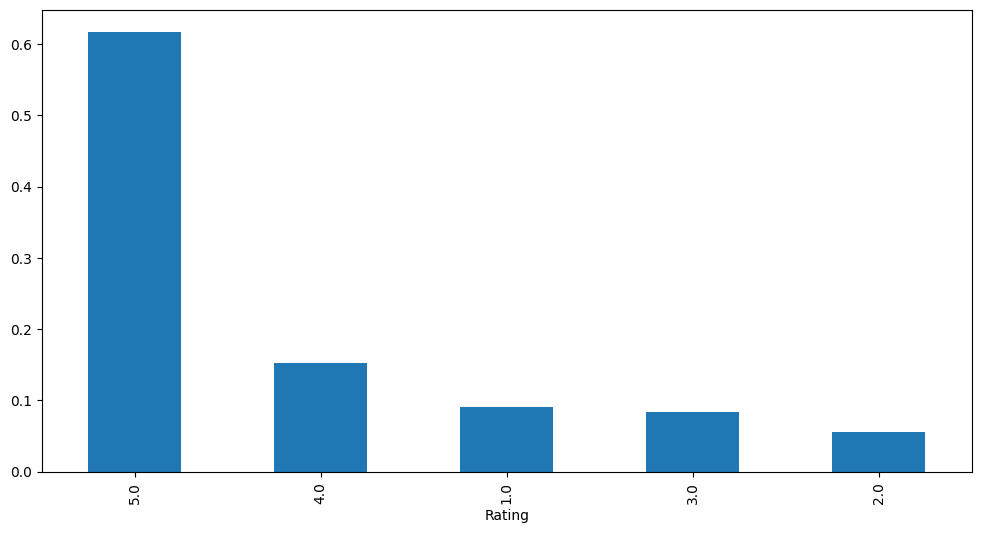

In [9]:
plt.figure(figsize = (12,6))
df['Rating'].value_counts(1).plot(kind='bar')
plt.show()

In [10]:
df['Rating'].value_counts(1)

Rating
5.0    0.617241
4.0    0.152115
1.0    0.090844
3.0    0.083927
2.0    0.055873
Name: proportion, dtype: float64

### Nummber of unique users and items

In [11]:
print('Number of unique USERS in Raw data = ', df['UserId'].nunique())
print('Number of unique ITEMS in Raw data = ', df['ProductId'].nunique())

Number of unique USERS in Raw data =  1210271
Number of unique ITEMS in Raw data =  249274


### Users with most no of rating

In [12]:
most_rated = df.groupby('UserId').size().sort_values(ascending=False)[:10]
most_rated

UserId
A3KEZLJ59C1JVH    389
A281NPSIMI1C2R    336
A3M174IC0VXOS2    326
A2V5R832QCSOMX    278
A3LJLRIZL38GG3    276
ALQGOMOY1F5X9     275
AKMEY1BSHSDG7     269
A3R9H6OKZHHRJD    259
A1M04H40ZVGWVG    249
A1RRMZKOMZ2M7J    225
dtype: int64

### Preprocessing

In [13]:
counts = df['UserId'].value_counts()
df_final = df[df['UserId'].isin(counts[counts >= 50].index)]

In [14]:
print('The number of observations in the final data =', len(df_final))
print('Number of unique USERS in the final data = ', df_final['UserId'].nunique())
print('Number of unique PRODUCTS in the final data = ', df_final['ProductId'].nunique())

The number of observations in the final data = 29559
Number of unique USERS in the final data =  361
Number of unique PRODUCTS in the final data =  17228


### Checking the density of the rating matrix

In [15]:
final_ratings_matrix = df_final.pivot(index = 'UserId', columns ='ProductId', values = 'Rating').fillna(0)
print('Shape of final_ratings_matrix: ', final_ratings_matrix.shape)

given_num_of_ratings = np.count_nonzero(final_ratings_matrix)
possible_num_of_ratings = final_ratings_matrix.shape[0] * final_ratings_matrix.shape[1]

density = (given_num_of_ratings/possible_num_of_ratings)
density *= 100
print ('density: {:4.2f}%'.format(density))

final_ratings_matrix.head()

Shape of final_ratings_matrix:  (361, 17228)
density: 0.48%


ProductId       0762451459  1304482596  1304482685  1304495396  1304511111  \
UserId                                                                       
A100WO06OQR8BQ         0.0         0.0         0.0         0.0         0.0   
A1047EDJ84IMAS         0.0         0.0         0.0         0.0         0.0   
A10G136JEISLVR         0.0         0.0         0.0         0.0         0.0   
A10Y59HW4O47N0         0.0         0.0         0.0         0.0         0.0   
A110PQTEI6THU7         0.0         0.0         0.0         0.0         0.0   

ProductId       1304511138  1304622665  1304624498  1304651029  130466578X  \
UserId                                                                       
A100WO06OQR8BQ         0.0         0.0         0.0         0.0         0.0   
A1047EDJ84IMAS         0.0         0.0         0.0         0.0         0.0   
A10G136JEISLVR         0.0         0.0         0.0         0.0         0.0   
A10Y59HW4O47N0         0.0         0.0         0.0         0.0         0.0   
A110PQTEI6THU7         0.0         0.0         0.0         0.0         0.0   

ProductId       ...  B00L3LB0IG  B00L3LBUGI  B00L4I5PJS  B00L5BXG36  \
UserId          ...                                                   
A100WO06OQR8BQ  ...         0.0         0.0         0.0         0.0   
A1047EDJ84IMAS  ...         0.0         0.0         0.0         0.0   
A10G136JEISLVR  ...         0.0         0.0         0.0         0.0   
A10Y59HW4O47N0  ...         0.0         0.0         0.0         0.0   
A110PQTEI6THU7  ...         0.0         0.0         0.0         0.0   

ProductId       B00L5KTZ0K  B00L7BX4FE  B00LG63DOM  B00LH81A0I  B00LLPT4HI  \
UserId                                                                       
A100WO06OQR8BQ         0.0         0.0         0.0         0.0         0.0   
A1047EDJ84IMAS         0.0         0.0         0.0         0.0         0.0   
A10G136JEISLVR         0.0         0.0         0.0         0.0         0.0   
A10Y59HW4O47N0         0.0         0.0         0.0         0.0         0.0   
A110PQTEI6THU7         0.0         0.0         0.0         0.0         0.0   

ProductId       B00LMOT7X4  
UserId                      
A100WO06OQR8BQ         0.0  
A1047EDJ84IMAS         0.0  
A10G136JEISLVR         0.0  
A10Y59HW4O47N0         0.0  
A110PQTEI6THU7         0.0  

[5 rows x 17228 columns]

### Product Based Recommendaton System

In [40]:
average_rating = df_final.drop('UserId',axis=1).groupby('ProductId').mean()['Rating']
count_rating = df_final.groupby('ProductId').count()['Rating']

final_rating = pd.DataFrame({'avg_rating':average_rating, 'rating_count':count_rating})
final_rating = final_rating.sort_values(by='avg_rating',ascending=False)

final_rating.head()

avg_rating  rating_count
ProductId                           
0762451459         5.0             1
B004JAZGOC         5.0             1
B004ITB3IW         5.0             6
B004ITYX52         5.0             1
B004IVM0EG         5.0             1

In [54]:
print("Max number of users interactions is:",count_rating.max())

Max number of users interactions is: 60


In [55]:
def top_n_products(final_rating, n, min_interaction):

    recommendations = final_rating[final_rating['rating_count']>=min_interaction]    
    recommendations = recommendations.sort_values('avg_rating',ascending=False)
    
    return recommendations.index[:n]

## Recommending top 5 products with 25 minimum interactions based on popularity

In [44]:
list(top_n_products(final_rating, 5, 25))

['B00AWLBACE', 'B00AWLB9G6', 'B00AE07BMQ', 'B000E0K7NQ', 'B00A0J09C0']

## Recommending top 5 products with 50 minimum interactions based on popularity

In [45]:
list(top_n_products(final_rating, 5, 50))

['B00AE0790U', 'B009FKNGGQ']

## Recommending top 5 products with 60 minimum interactions based on popularity

In [56]:
list(top_n_products(final_rating, 5, 60))

['B009FKNGGQ']